# 文本数据分析的重点


- **文本数据的普遍性与价值**
 
  - 文本数据无处不在（如新闻、邮件、评论等），蕴含大量有价值的信息。
   
  - 过去，计算机分析文本非常困难，因为自然语言不像编程语言那样易于解析。


- **语言模型的突破**
 
  - 新一代语言模型使得文本分析几乎达到人类水平。
   
  - 某些任务上，语言模型的表现甚至平均超过了人类。


- **本章内容概览**
 
  - 介绍如何利用大型语言模型进行文本分析。
   
  - 语言模型因其在大量文本上的训练，非常适合于文本分析任务，无需依赖外部工具。


- **涵盖的主要文本分析任务**
 
  - 文本分类
   
  - 从文本中提取结构化数据（如表格数据）
   
  - 文本聚类，将语义相似的文档分组


- **实践意义**
 
  - 通过本章的案例，读者可以基于语言模型构建自定义的文本数据处理流程。
   
  - 虽然分类、信息抽取和聚类是重要的分析类型，但实际应用中还会有更多需求。

# 前提条件

安装pandas和scikit-learn

>pip install pandas

>pip install scikit-learn

# 文本分类（Classification）


- **场景描述**  
  
以决定是否观看新电影为例，社交媒体上充满了各种评论。手动阅读每条评论以判断总体评价太耗时，语言模型可以自动化这一任务。


- **文本分类定义**  
 
文本分类是将一段文本映射到一组固定类别中的某一个。以电影评论为例，通常分为“积极（Positive）”或“消极（Negative）”两类。


- **示例（表4.1）**  
 
| 评论摘录 | 分类 |
| --- | --- |
| “this movie is a piece of reality very well realized artistically.” |Positive |
| “this is an obviously weak, cheap mobster melodrama.” | Negative |


- **应用场景扩展**  
 
  - 电影评论情感分类（积极/消极）

  - 邮件自动分类（如工作、爱好、育儿等多类别）

  - 网站评论过滤（如侮辱性/非侮辱性）


- **关键点**  
 
  - 文本分类可以有两类或多类
   
  - 语言模型可高效自动完成这些分类任务


- **总结**  
  
语言模型能够轻松实现文本分类，广泛应用于评论分析、邮件管理和内容过滤等场景。

## 创建分类提示词（Prompts）
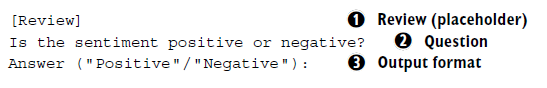

### 1. 分类提示词模板

- 所有分类任务的提示词都遵循同一个模板。

- 模板包含一个占位符：评论文本（①）。

- 模板包括三部分内容：
  
  1. 评论文本（替换占位符）
    
  2. 任务说明（②）：让模型判定评论的情感是正面还是负面
    
  3. 输出格式定义（③）：明确要求输出“Positive”或“Negative”


### 2. 明确输出格式的重要性

- 不指定输出格式，模型可能会用多种方式表达情感（如“P/N”或完整句子）。

- 统一输出格式有助于后续聚合分类结果，便于统计大多数人的观点。


### 3. 示例函数

```python

def create_prompt(text):
   
    task = 'Is the sentiment positive or negative?'
       
    answer_format = 'Answer (''Positive''/''Negative'')'
       
    return f'{text}\n{task}\n{answer_format}:'

```

- 该函数根据输入评论生成符合模板的提示词。


### 4. 应用目的

- 通过对每条评论的情感分类结果进行聚合，判断大多数人对电影的看法。

## 调用语言模型


### 1. 使用模型

- 通过chat completions接口进行交互。

- 该接口适用于多轮对话，需提供消息历史（本例仅有一条用户消息）。


## 2. 调用接口的基本代码示例

```python

import openai

client = openai.OpenAI()

response = client.chat.completions.create(
   
                    model='gpt-4o',
                        
                    messages=[
                            
                    {'role':'user', 'content':prompt}
                        
                    ]

                )

```


## 3. 网络调用的鲁棒性问题

- GPT模型托管在云端，远程访问可能因网络问题失败。

- 批量处理数据时，出现调用失败的概率更高。


## 4. 推荐的重试机制

- 最好实现自动重试机制，避免因临时故障中断流程。

- 采用递增等待时间的方式进行重试。


## 5. 完整的调用函数示例

```python

import openai

import time


client = openai.OpenAI()


def call_llm(prompt):
   
    for nr_retries in range(1, 4):
           
        try:
                   
            response = client.chat.completions.create(
                           
                    model='gpt-4o',
                                   
                    messages=[
                                       
                    {'role':'user', 'content':prompt}
                                   
                    ]
                               
                    )
                       
            return response.choices[0].message.content
       
        except:
                   
            time.sleep(nr_retries * 2)
               
        raise Exception('Cannot query OpenAI model!')

```

- 最多尝试3次，每次失败后等待时间递增。

- 成功则返回结果，否则抛出异常。


## 6. 实践建议

- 在大规模调用时务必实现重试机制，提高系统稳定性。

- 合理处理异常，避免因单次失败影响整体流程。